In [11]:
import numpy as np
import gudhi
import json
import csv
import matplotlib
import matplotlib.pyplot as plot
import math
import plotly.graph_objects as go
import itertools
import import_ipynb
import vineyards
from vineyards import *
import time


In [21]:
##---Inputs----###
# d: dimension of vines 
# n_files: number time steps to analyze
#name: name of the simulation
#PH: if True, it takes filtration values from a JSON file in PH folder. If False, it computes such values directly with gudhi


d=1
n_files=24     
name="rings"
PH=True
step=0  



In [22]:
##---Getting filtration values for each time step---##

if PH==True:
                
    with open("PH/PH_"+name+"/PH_{}.json".format(step), "r") as f:
          PH = json.load(f)
    
    
    #------Get filtration values        
    flt=[]
    flt = sorted( PH["filtration"], key=lambda x: (len(x[0]), x[0])) #for vine implementation
    
    # check the ordering: ordered by the vertices, for each simplex the sequence of filtration value
    #print(flt == sorted(flt, key=lambda x: (len(x[0]), x[0]))) #check
    flt_time = [val for _, val in flt] 
    flt_nodes=[val for  val,_ in flt]
    for step in range(0,n_files):
    
        with open("PH/PH_"+name+"/PH_{}.json".format(step), "r") as f:
            PH = json.load(f)
        flt=[]    
        flt = sorted( PH["filtration"], key=lambda x: (len(x[0]), x[0])) #for vine implementation 
        new_time = [val for _, val in flt] 
        flt_time=np.column_stack((flt_time, new_time));        
        #print(flt == sorted(flt, key=lambda x: (len(x[0]), x[0]))) #check
        
else:
    points = np.loadtxt('simulations/'+name+'/'+name+str(step)+'.txt')  
    rips_complex = gudhi.RipsComplex(points=points)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2) 
    flt=[]
    flt=  simplex_tree.get_filtration(); 
    flt = sorted(flt, key=lambda x: (len(x[0]), x[0])) #for vine implementation
    flt_val = [val for _, val in flt] #list comprehension
    flt_nodes=[first for first ,_ in  flt]
    flt_time =flt_val
    for step in range (1,n_files): 

        points = np.loadtxt('simulations/'+name+'/'+name+str(step)+'.txt')
        
        rips_complex = gudhi.RipsComplex(points=points)
        simplex_tree = rips_complex.create_simplex_tree(max_dimension=2) 
        flt=  simplex_tree.get_filtration(); 
        flt = sorted(flt, key=lambda x: (len(x[0]), x[0])) #per vine implementation
        flt_val = [val for _, val in flt] #list comprehension
        flt_time=np.column_stack((flt_time, flt_val));
        #PH = simplex_tree.persistence()
        #PHs = [[y for y in PH if y[0]==x] for x in [0,1]]
       
    

simplices=[]
for i in range(0, len(flt_nodes)):
    simplices.append(Simplex(flt_nodes[i], flt_time[i]))

In [23]:
##---Computing vineyards---##

start = time.time()
vineyard=Vineyard(simplices, dim=d, print_progress=False)
end = time.time()
comp_time=end-start
vines=vineyard.nontrivial_vines()


print(f"Processing time: {end - start:.4f} seconds")

Processing time: 88.5074 seconds


In [20]:

##---Save vineyards in JSON file---###
"""
def sanitize_inf_for_json(obj):
    if isinstance(obj, float):
        if math.isinf(obj):
            return "inf" if obj > 0 else "-inf"
        else:
            return obj
    elif isinstance(obj, list):
        return [sanitize_inf_for_json(item) for item in obj]
    elif isinstance(obj, dict):
        return {key: sanitize_inf_for_json(value) for key, value in obj.items()}
    else:
        return obj

vines=vineyard.nontrivial_vines()

vine_dict = {}

for i, vine in enumerate(vines, 1):
    vine_dict[f"Vine{i}"] = vine.to_dict()

vine_dict_sanitized = sanitize_inf_for_json(vine_dict)
vine_dict_sanitized["Computational Time"] = comp_time

with open("vines/"+name+"_vines"+str(d)+".json", "w") as f:
    json.dump(vine_dict_sanitized, f, indent=2)


with open("vines/"+name+"_vines"+str(d)+".json", 'r') as file:
    Vines = json.load(file)
"""

In [24]:
len(vines)

8

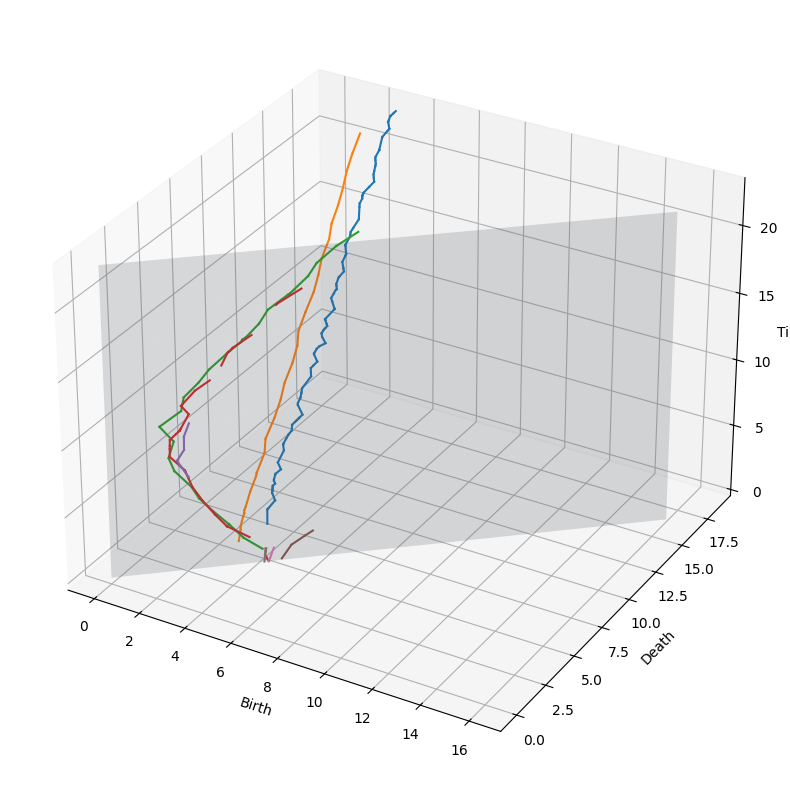

In [26]:
##---Plots---##
vineyard.plot(start_k=0, end_k=None, start_timestep=0, end_timestep=None)
plt.show()

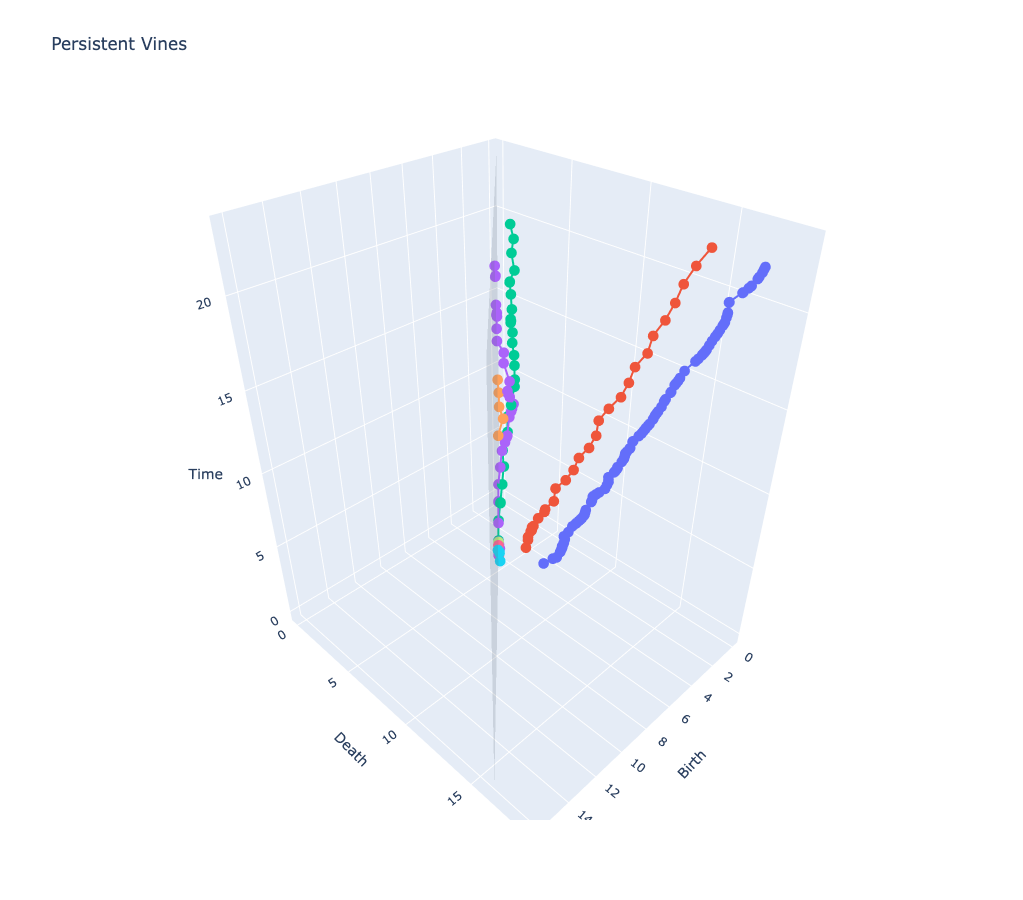

In [27]:
vineyard.plot_interactive(start_k=0, end_k=None,show_legend=True, start_timestep=0, end_timestep=None)
plt.show()
